In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from hierarqcal import (
    Qhierarchy,
    Qcycle,
    Qpermute,
    Qmask,
    Qunmask,
    Qpivot,
    Qinit,
    Qmotif,
    Qmotifs,
    plot_motif,
    plot_circuit,
    Qunitary,
)
from pennylane import AngleEmbedding
import pennylane as qml
from hierarqcal.pennylane.pennylane_circuits import V2, U2, V4


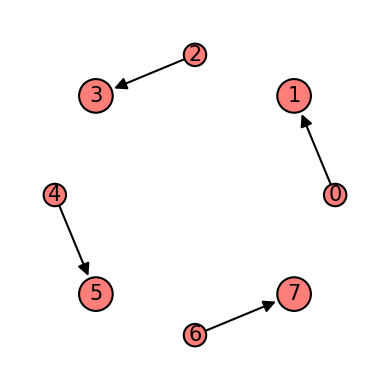

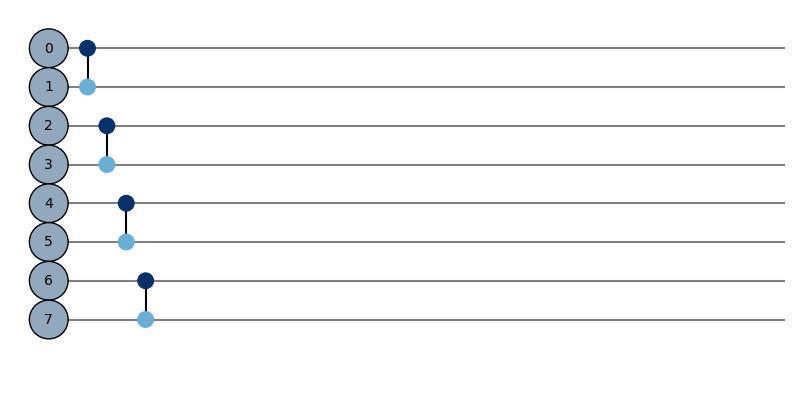

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

In [35]:
mask = Qinit(8) + Qmask("10", mapping=u0_2)
plot_motif(mask[1])
plot_circuit(mask)